In [1]:
import matplotlib.pyplot as plt
import numpy as np

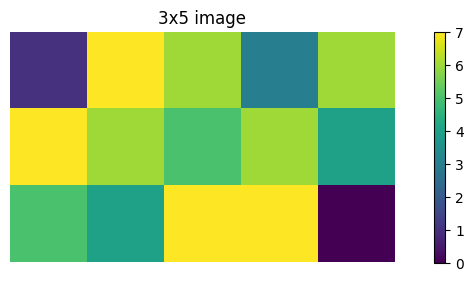

In [12]:
image = np.array([[1,7,6,3,6],
                  [7,6,5,6,4],
                  [5,4,7,7,0]])

plt.figure(figsize=(10,3))
plt.imshow(image)
plt.title("3x5 image")
plt.axis("off")
plt.colorbar()
plt.show()

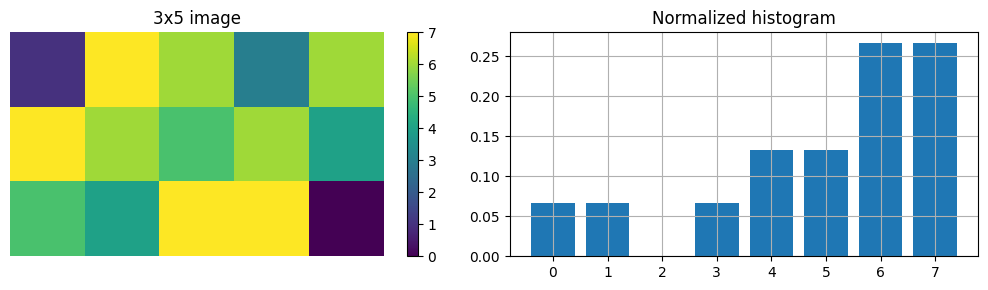

In [13]:
# manual histogram calculation
n_pix = np.size(image)
values_list = np.arange(0,8)
hist = np.zeros(np.size(values_list))
for k,value in enumerate(values_list):
    hist[k]=len(image[image == value])/n_pix

fig = plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("3x5 image")
plt.axis("off")
plt.colorbar()

plt.subplot(1,2,2)
plt.bar(values_list,hist)
plt.title("Normalized histogram")
plt.grid()

fig.tight_layout()
plt.show()

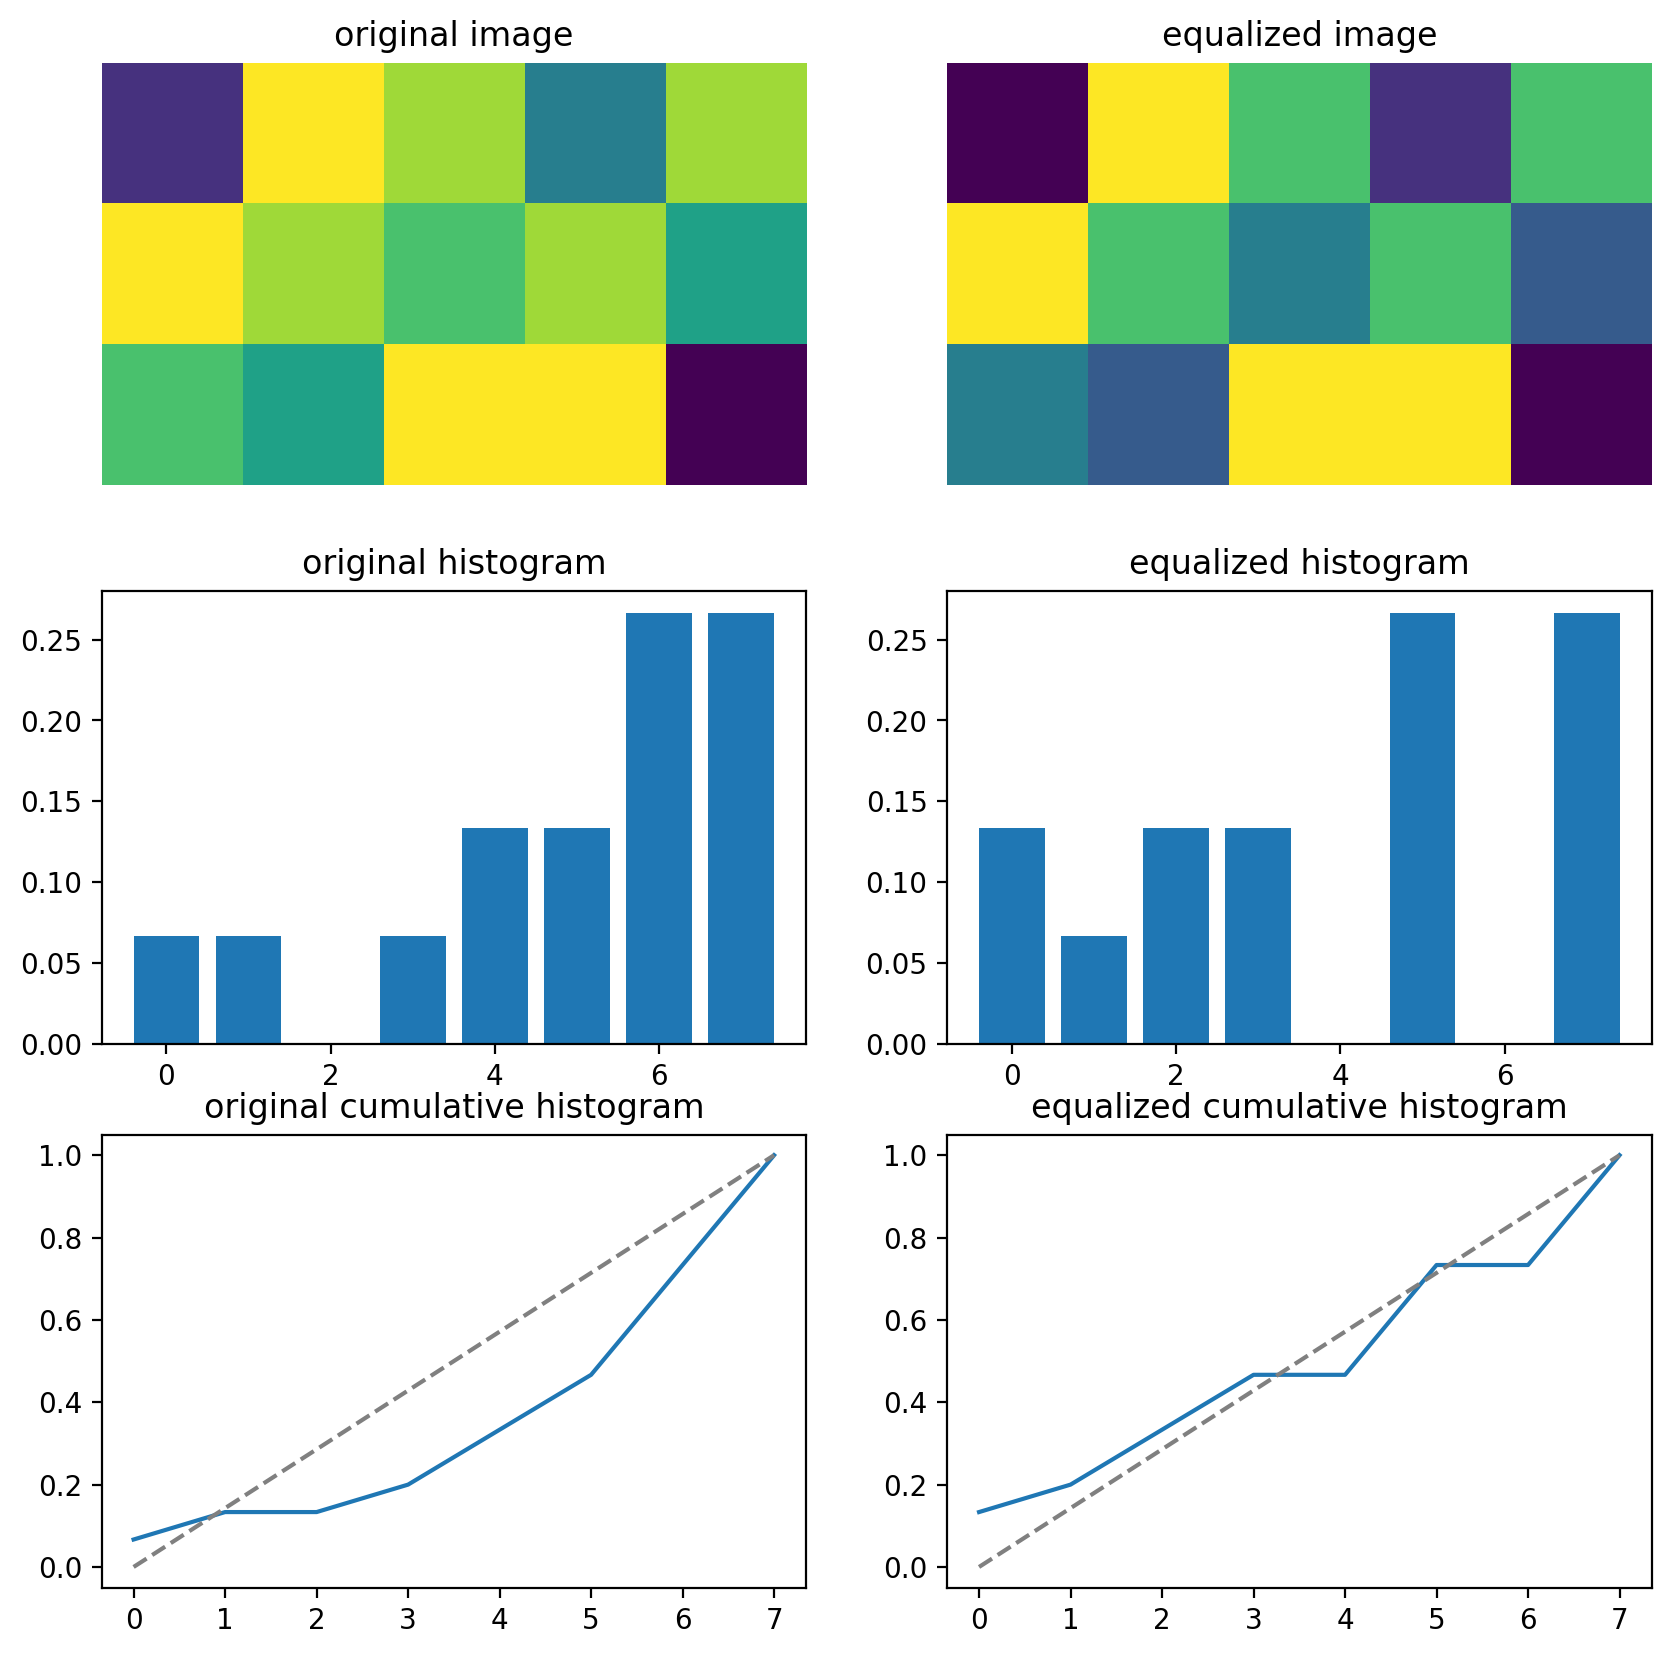

In [31]:
# Perform manual histogram equalization

cum_hist = np.cumsum(hist)          # get cumulated histogram
transform = np.floor(7*cum_hist)    # get transformed values

# apply transformation
equalized_image = image.copy()
for value in values_list:
    equalized_image[equalized_image==value] = transform[value]

# get equalized histogram
equalized_hist = np.zeros(np.size(values_list))
for k,value in enumerate(values_list):
    equalized_hist[k]=len(equalized_image[equalized_image == value])/n_pix

plt.figure(figsize=(10,10),dpi=200)
plt.subplot(3,2,1)
plt.imshow(image)
plt.title("original image")
plt.axis("off")

plt.subplot(3,2,2)
plt.imshow(equalized_image)
plt.title("equalized image")
plt.axis("off")

plt.subplot(3,2,3)
plt.bar(values_list,hist)
plt.title("original histogram")

plt.subplot(3,2,4)
plt.bar(values_list,equalized_hist)
plt.title("equalized histogram")

plt.subplot(3,2,5)
plt.plot(values_list,cum_hist)
plt.plot(values_list,values_list/7,'--',c='gray')
plt.title("original cumulative histogram")


plt.subplot(3,2,6)
plt.plot(values_list,np.cumsum(equalized_hist))
plt.plot(values_list,values_list/7,'--',c='gray')
plt.title("equalized cumulative histogram")

plt.show()
    
